# Cotação de Preços

Este projeto visa facilitar as tarefas de cotações de preços na internet.
Através de técnicas de WebScaraping,foram automatizados alguns processos repetitivos de coleta de informações.
O objetivo é pesquisar os itens em diversas lojas através do site buscapé e retornar 
o melhor preço e algumas estatisticas ao cliente final. 


In [1]:
import requests
import pandas as pd
import pandas_profiling
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
lista_produtos = []
pesquisa = []

In [3]:
#Definição da plataforma de cotação
url_base = "http://www.buscape.com.br"
url = "https://www.buscape.com.br/search?q="

In [4]:
itens = input("Quantos itens deseja cotar? ")
pesquisa = input("Digite o produto a ser cotado: ")


Quantos itens deseja cotar? 3
Digite o produto a ser cotado: sabonete lux


In [5]:
print (url+pesquisa)

https://www.buscape.com.br/search?q=sabonete lux


In [6]:
response = requests.get(url + pesquisa)

In [7]:
#Criação do objeto Beautfulsoup
site = BeautifulSoup(response.text, 'html.parser')

In [8]:
#print(site.prettify())

In [9]:
produtos = site.findAll('div', attrs= {'class': 'card card--offer card--cpc'})

In [10]:
loja1 = []

In [11]:
#Percorrendo a pagina HTML da platafoma de cotação e criando o Dataframe.
for produto in produtos:
   
    titulo = produto.find('a', attrs= {'class': 'link'})
    valoreal = produto.find('span', attrs= {'class': 'mainValue'})
    valorcent = produto.find('span', attrs= {'class': 'centsValue'})
   # link = url_base + link_produto
    if(valorcent):
        valor = valoreal.text + valorcent.text
    else:
        print(valoreal)
        
    loja = produto.find('a', attrs = {'class': 'merchantName'})
    loja1 = produto.find('a', attrs = {'class': 'merchantName'})
    link_produto = produto.find('a', attrs = {'class': 'link'})
    link_produto = link_produto['href']
    lista_produtos.append([titulo.text,valor,loja.text,url+link_produto]) 
    
  

In [12]:
cotacao = pd.DataFrame(lista_produtos, columns=['Titulo','Preco','Loja','Link'], )

In [13]:
cotacao.to_csv('cotacao.csv', index=False)

In [14]:
#criando o arquivo csv
cotacao1 = pd.read_csv('cotacao.csv' )

In [15]:
cotacao1

,Titulo,Preco,Loja,Link
0,Sabonete em Barra Lux Botanicals Buquê de Jasm...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
1,Sabonete em Barra Lux Botanicals Flor de Verbe...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
2,Refil Sabonete Líquido Lux Botanicals Lavanda ...,"R$ 2,95",DrogaRaia.com,https://www.buscape.com.br/search?q=/lead?oid=...
3,Sabonete em Barra Lux Botanicals Flor de Lótus...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
4,Sabonete em Barra Lux Botanicals Lavanda com 8...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
5,Refil Sabonete Líquido Lux Botanicals Buquê de...,"R$ 4,69",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
6,Sabonete Líquido Lux Botanicals Flor de Lótus ...,"R$ 4,69",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
7,Sabonete em Barra Lux Botanicals Flor de Verbe...,"R$ 1,29",Farma 22,https://www.buscape.com.br/search?q=/lead?oid=...
8,Sabonete Líquido Lux Botanicals Rosas Francesa...,"R$ 4,78",Farmadelivery,https://www.buscape.com.br/search?q=/lead?oid=...
9,Refil Sabonete Líquido Lux Botanicals Capim Li...,"R$ 2,95",DrogaRaia.com,https://www.buscape.com.br/search?q=/lead?oid=...


In [16]:
#Filtrando lojas repetidas
cotacao1 = cotacao1.drop_duplicates("Loja")

In [17]:
cotacao1

,Titulo,Preco,Loja,Link
0,Sabonete em Barra Lux Botanicals Buquê de Jasm...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...
2,Refil Sabonete Líquido Lux Botanicals Lavanda ...,"R$ 2,95",DrogaRaia.com,https://www.buscape.com.br/search?q=/lead?oid=...
7,Sabonete em Barra Lux Botanicals Flor de Verbe...,"R$ 1,29",Farma 22,https://www.buscape.com.br/search?q=/lead?oid=...
8,Sabonete Líquido Lux Botanicals Rosas Francesa...,"R$ 4,78",Farmadelivery,https://www.buscape.com.br/search?q=/lead?oid=...
17,Sabonete Líquido com Óleos Hidraflorais Capim-...,"R$ 6,94",Amazon,https://www.buscape.com.br/search?q=/lead?oid=...
18,Sabonete Líquido Refil Lux Suave 200Ml Flor De...,"R$ 8,88",Shoptime,https://www.buscape.com.br/search?q=/lead?oid=...
19,Sabonete Lux Buque De Jasmin 85g 4Unidades,"R$ 6,89",Submarino,https://www.buscape.com.br/search?q=/lead?oid=...
20,Sabonete Lux Buque De Jasmin 85g 4Unidades,"R$ 6,89",Americanas,https://www.buscape.com.br/search?q=/lead?oid=...
28,Sabonete Líquido para as Mãos Lux 500ml,"R$ 16,90",Magazine Luiza,https://www.buscape.com.br/search?q=/lead?oid=...


<BarContainer object of 9 artists>

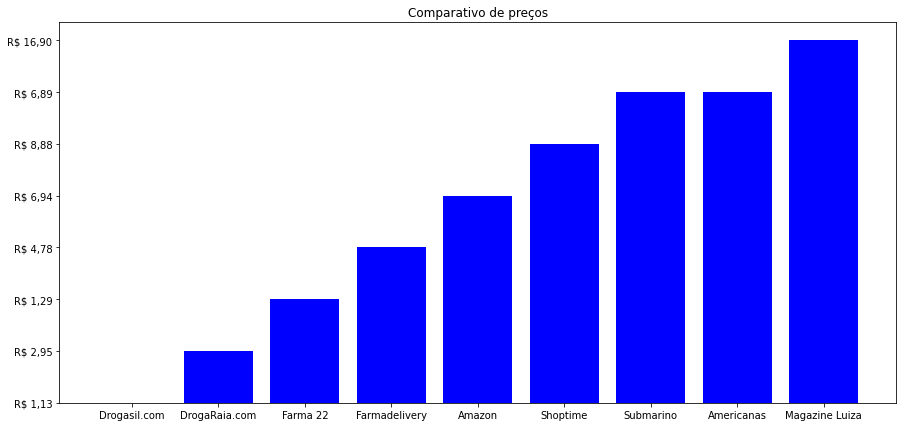

In [56]:
plt.figure(figsize=(15, 7))
plt.title("Comparativo de preços")
plt.bar(cotacao1.Loja,cotacao1.Preco, color='blue')


In [19]:
Lojas = cotacao1.Loja


In [20]:
print('Foi realizada pesquisa entre as lojas: ')
Lojas

Foi realizada pesquisa entre as lojas: 


0       Drogasil.com
2      DrogaRaia.com
7           Farma 22
8      Farmadelivery
17            Amazon
18          Shoptime
19         Submarino
20        Americanas
28    Magazine Luiza
Name: Loja, dtype: object

In [21]:
pmax = cotacao1['Preco'].max()

pmin = cotacao1['Preco'].min()

In [22]:
print(pmax[3:])

8,88


In [23]:
precomax  = pmax[3:]

In [24]:
precomin  = pmin[3:]

In [25]:

pmax1 = float(precomax.replace(',', ''))

In [26]:
pmin1 = float(precomin.replace(',', ''))

In [39]:
variacaomedia = (pmax1 -pmin1)/100
variacaomedia = round(variacaomedia,3)
variacaomedia


7.75

In [28]:

pmax = cotacao1[cotacao1['Preco']==cotacao1['Preco'].max()]

In [29]:
pmin =cotacao1[cotacao1['Preco']==cotacao1['Preco'].min()]

In [30]:
print("O melhor preco esta na loja: " )




pmin

O melhor preco esta na loja: 


,Titulo,Preco,Loja,Link
0,Sabonete em Barra Lux Botanicals Buquê de Jasm...,"R$ 1,13",Drogasil.com,https://www.buscape.com.br/search?q=/lead?oid=...


In [31]:
print("O preço mais alto esta na loja: " )
pmax

O preço mais alto esta na loja: 


,Titulo,Preco,Loja,Link
18,Sabonete Líquido Refil Lux Suave 200Ml Flor De...,"R$ 8,88",Shoptime,https://www.buscape.com.br/search?q=/lead?oid=...
